In [1]:
# Do all imports
import pandas as pd
import numpy as np

import os

PWD = os.getcwd()

import dotenv

dotenv.load_dotenv()

import sys

sys.path.insert(1, PWD + './helpers.py')
from helpers import scatter_plot

df = (
    pd
    .read_sql_query(
        sql="""
            select
                *
            from social_media_posts smadd
            where
                smadd.account_channel = 'TikTok'
            order by smadd.posted_at desc
        """,
        con=os.getenv("DATABASE_URL"),
        parse_dates=['last_scrape_at', 'posted_at_date', 'posted_at', 'inserted_at', 'updated_at', 'account_registered_at']
    )

)

,id,thumbnail_url,social_media_account_id,account_creator_id,account_campaign_id,account_country,account_language,account_app_platform,account_channel,account_username,...,last_scrape_id,posted_at,posted_at_date,views,likes,comments,saves,shares,inserted_at,updated_at
0,7606691775847075094,https://p19-pu-sign-no.tiktokcdn-eu.com/tos-no...,12282,324,5,United_States,English,iOS,TikTok,jess.brainhealth,...,1303723,2026-02-14 12:09:06,2026-02-14,278,15,0,1,1,2026-02-14 14:05:40.314081+00:00,2026-02-14 14:05:40.314081+00:00
1,7606497718277590290,https://p16-common-sign.tiktokcdn-eu.com/tos-a...,2537,1707,1,United_States,English,iOS,TikTok,ani.growth,...,1300910,2026-02-13 23:36:06,2026-02-13,14,2,0,0,0,2026-02-13 23:45:25.145918+00:00,2026-02-13 23:45:25.145918+00:00
2,7606495183458372880,https://p16-common-sign.tiktokcdn-eu.com/tos-a...,12302,10777,1,United_States,English,Android,TikTok,kyle.growth,...,1302443,2026-02-13 23:26:28,2026-02-13,0,0,0,0,0,2026-02-13 23:46:40.353731+00:00,2026-02-13 23:46:40.353731+00:00
3,7606491786441231638,https://p16-pu-sign-no.tiktokcdn-eu.com/tos-no...,12851,11322,5,United_States,English,iOS,TikTok,livia.brainhealth,...,1285456,2026-02-13 23:13:05,2026-02-13,316,6,0,5,0,2026-02-13 23:31:09.773726+00:00,2026-02-13 23:31:09.773726+00:00
4,7606491263449238806,https://p16-pu-sign-no.tiktokcdn-eu.com/tos-no...,1051,2626,1,United_States,English,iOS,TikTok,zoe_trending,...,1298280,2026-02-13 23:11:02,2026-02-13,272,8,0,0,1,2026-02-13 23:42:52.540972+00:00,2026-02-13 23:42:52.540972+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44504,7353632222089383174,https://p77-sign-va.tiktokcdn.com/tos-maliva-p...,1701,2175,1,United_States,English,iOS,TikTok,viral.cleo,...,352808,2024-04-03 13:28:47,2024-04-03,220,1,0,0,0,2025-12-20 21:56:18.338350+00:00,2026-02-08 10:31:16.004475+00:00
44505,7353632073858419973,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,1701,2175,1,United_States,English,iOS,TikTok,viral.cleo,...,352809,2024-04-03 13:28:12,2024-04-03,85,1,0,0,0,2025-12-20 21:56:18.338350+00:00,2026-02-08 10:31:16.004475+00:00
44506,7353631905486621958,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,1701,2175,1,United_States,English,iOS,TikTok,viral.cleo,...,352810,2024-04-03 13:27:34,2024-04-03,123,1,0,0,0,2025-12-20 21:56:18.338350+00:00,2026-02-08 10:31:16.004475+00:00
44507,7342175064218946859,https://p16-common-sign.tiktokcdn-us.com/tos-u...,1873,871,1,United_States,English,iOS,TikTok,lisabeth.viral,...,215717,2024-03-03 16:29:34,2024-03-03,2600000,209800,975,22000,12300,2025-12-20 21:54:11.941867+00:00,2026-02-08 10:31:16.004475+00:00


In [4]:
vol_cut_ranges = [
      -np.inf,
            0,
        1_000,
       5_000,
       10_000,
      100_000,
      250_000,
      500_000,
       np.inf,
]


df["vol_cut"] = pd.cut(df['views'], vol_cut_ranges)

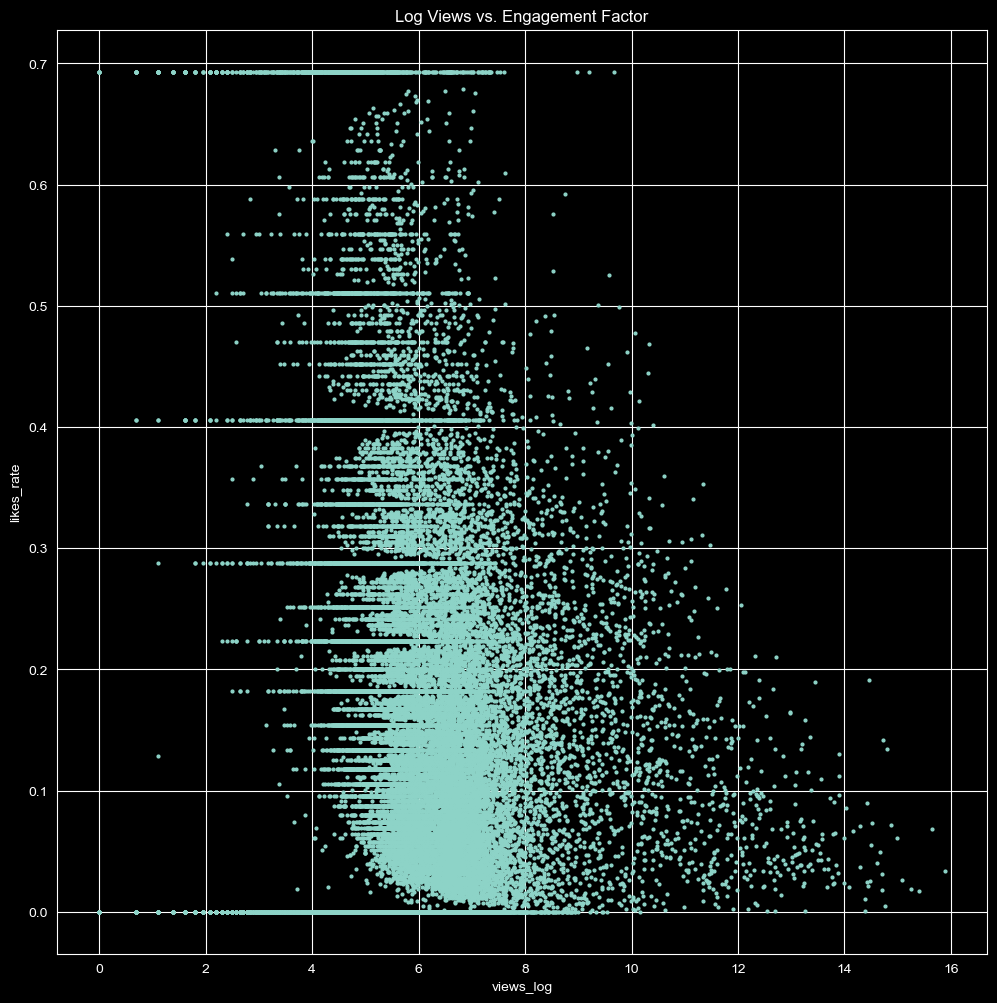

In [25]:
df = (
    df
    .assign(
        likes_rate=lambda x: x['likes'] / x["views"],
        comments_rate=lambda x: x['comments'] / x["views"],
        saves_rate=lambda x: x['saves'] / x["views"],
        shares_rate=lambda x: x['shares'] / x["views"],
        likes_to_comments=lambda x: (x['comments'] / x["likes"]).clip(0, 1),
    )
)
scatter_plot(
    df.assign(views_log = lambda x: np.log(x.views+1), likes_rate_log = lambda x:  np.log(x.likes_to_comments + 1)),
    "views_log",
    "likes_rate_log",
    xlabel = "views_log",
    ylabel = "likes_rate",
    title = "Log Views vs. Engagement Factor"
)

In [ ]:
# TODO: CLAUDE implements here